In [51]:
import pandas as pd
import os
import matplotlib.pyplot as plt
import numpy as np
from scipy.interpolate import BSpline
from scipy.signal import savgol_filter
sep = os.sep

In [52]:
os.chdir('C:\\Projects\\ature\\')

In [174]:
train_val = pd.read_csv('net_logs'+sep+'patchnet-drive.chk.tar.csv', index_col='TYPE')

val = train_val.query('TYPE==1')
T_val = np.arange(val.shape[0])

train = train_val.query('TYPE==0')
T_train =np.arange(train.shape[0])

test= pd.read_csv('net_logs'+sep+'unet-driveFAKE.chk.tarTEST.csv', index_col='TYPE')
T_test = np.arange(test.shape[0])

### Validation Precision-Recall

In [62]:
plt.rcParams["figure.figsize"] = [8,8]
prec_hat=savgol_filter(val['PRECISION'], 3, 1)
rec_hat=savgol_filter(val['RECALL'], 3, 1)
plt.xlabel('PRECISION')
plt.ylabel('RECALL')
import itertools
z = np.linspace(0,0.9, len(prec_hat))
y = np.column_stack((z,z,z))
colors = itertools.cycle
plt.scatter(prec_hat, rec_hat, color=y)
plt.xlim((0.6, 1))
plt.ylim((0.6, 1))
plt.show()

ValueError: If mode is 'interp', window_length must be less than or equal to the size of x.

### Validation F1 Score

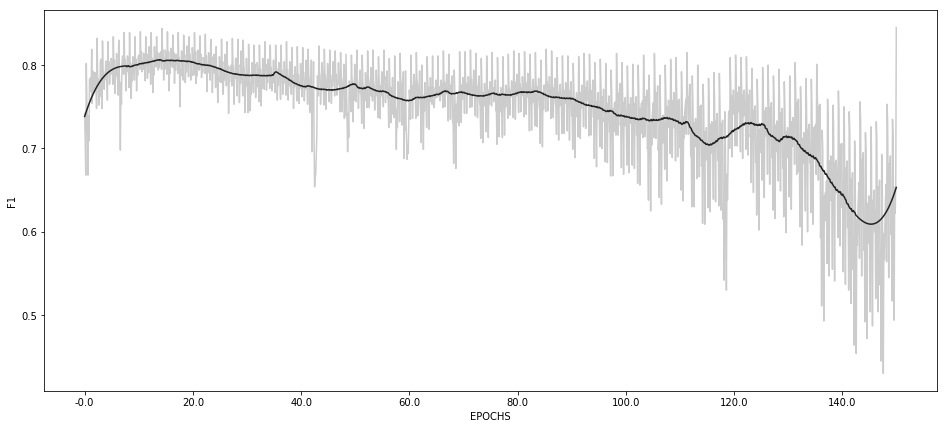

In [66]:
plt.rcParams["figure.figsize"] = [16,7]
f1hat = savgol_filter(val['F1'], 151, 3)
fig, ax = plt.subplots()
fig.canvas.draw()
plt.plot(T_val,val['F1'], color='#cccccc')
plt.plot(T_val,f1hat, color='#222222')
labels = ax.get_xticks()
labels = np.array(labels)//val.query('EPOCH==1').shape[0]
ax.set_xticklabels(labels)
plt.xlabel('EPOCHS')
plt.ylabel('F1')
plt.show()

### Validation Accuracy

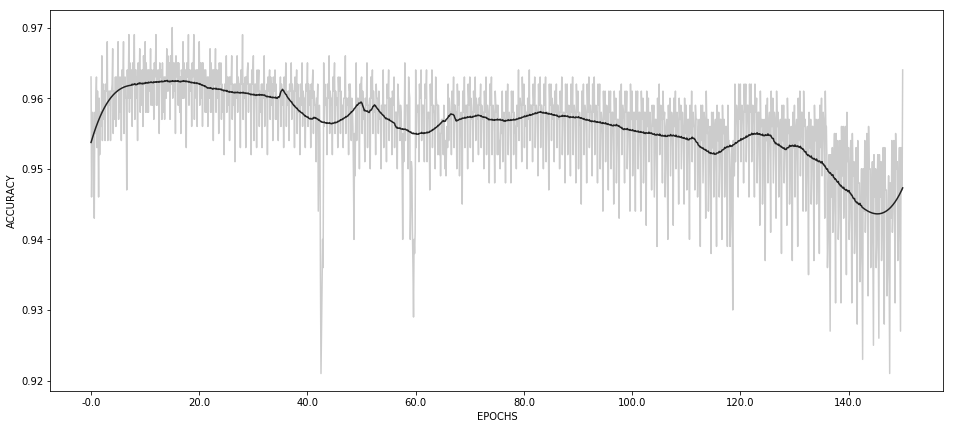

In [67]:
plt.rcParams["figure.figsize"] = [16,7]
f1hat = savgol_filter(val['ACCURACY'], 151, 3)
fig, ax = plt.subplots()
fig.canvas.draw()
plt.plot(T_val,val['ACCURACY'], color='#cccccc')
plt.plot(T_val,f1hat, color='#222222')
labels = ax.get_xticks()
labels = np.array(labels)//val.query('EPOCH==1').shape[0]
ax.set_xticklabels(labels)
plt.xlabel('EPOCHS')
plt.ylabel('ACCURACY')
plt.show()

### Training F1 Score

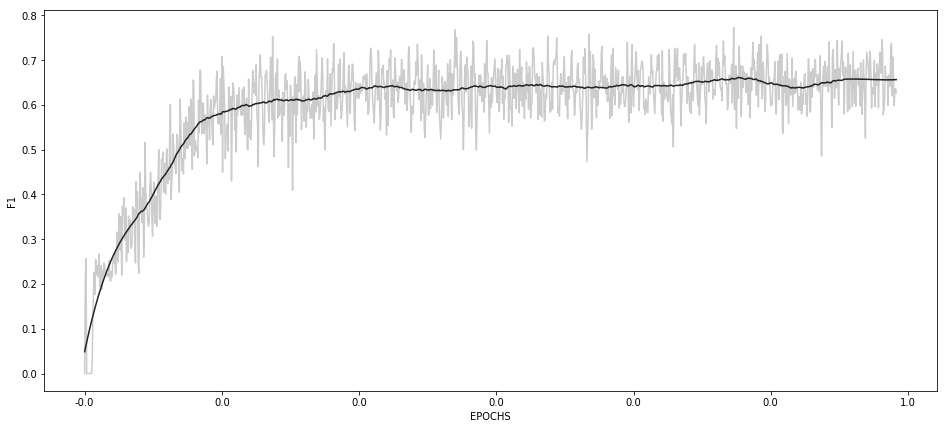

In [175]:
plt.rcParams["figure.figsize"] = [16,7]
f1hat = savgol_filter(train['F1'], 151, 3)
fig, ax = plt.subplots()
fig.canvas.draw()
plt.plot(T_train,train['F1'], color='#cccccc')
plt.plot(T_train,f1hat, color='#222222')
labels = ax.get_xticks()
labels = np.array(labels)//train.query('EPOCH==1').shape[0]
ax.set_xticklabels(labels)
plt.xlabel('EPOCHS')
plt.ylabel('F1')
plt.show()

### Training precision-recall

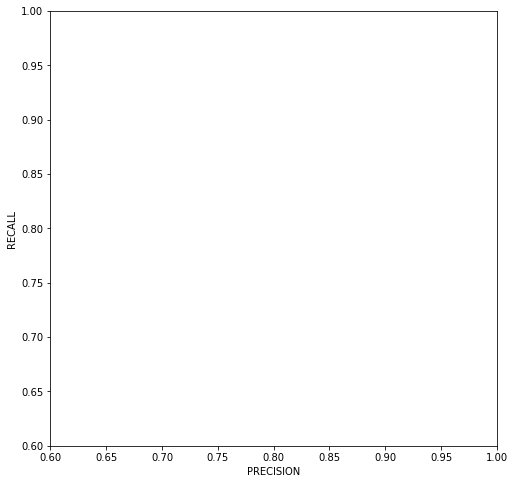

In [176]:
plt.rcParams["figure.figsize"] = [8,8]
prec_hat=savgol_filter(train['PRECISION'], 11, 1)
rec_hat=savgol_filter(train['RECALL'], 11, 1)
plt.xlabel('PRECISION')
plt.ylabel('RECALL')
import itertools
z = np.linspace(0,0.9, len(prec_hat))
y = np.column_stack((z,z,z))
colors = itertools.cycle
plt.scatter(prec_hat, rec_hat, color=y)
plt.xlim((0.6, 1))
plt.ylim((0.6, 1))
plt.show()

### Training loss

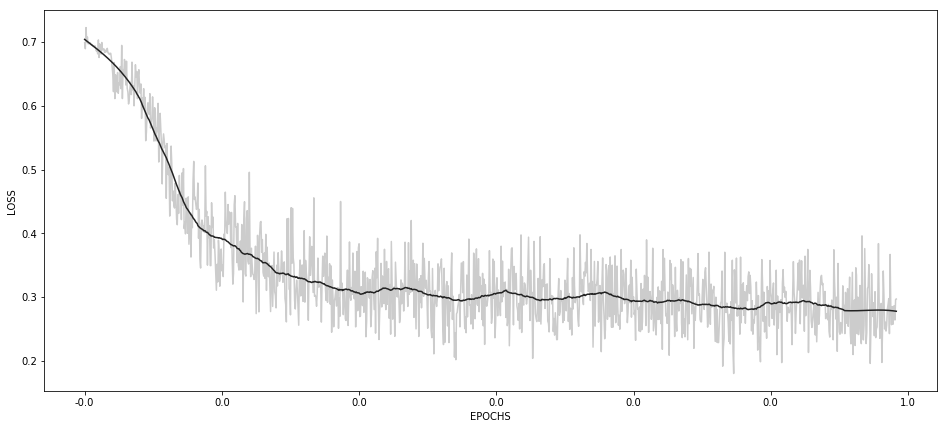

In [177]:
plt.rcParams["figure.figsize"] = [16,7]
f1hat = savgol_filter(train['LOSS'], 151, 3)
fig, ax = plt.subplots()
fig.canvas.draw()
plt.plot(T_train,train['LOSS'], color='#cccccc')
plt.plot(T_train,f1hat, color='#222222')
labels = ax.get_xticks()
labels = np.array(labels)//train.query('EPOCH==1').shape[0]
ax.set_xticklabels(labels)
plt.xlabel('EPOCHS')
plt.ylabel('LOSS')
plt.show()

### Training Accuracy

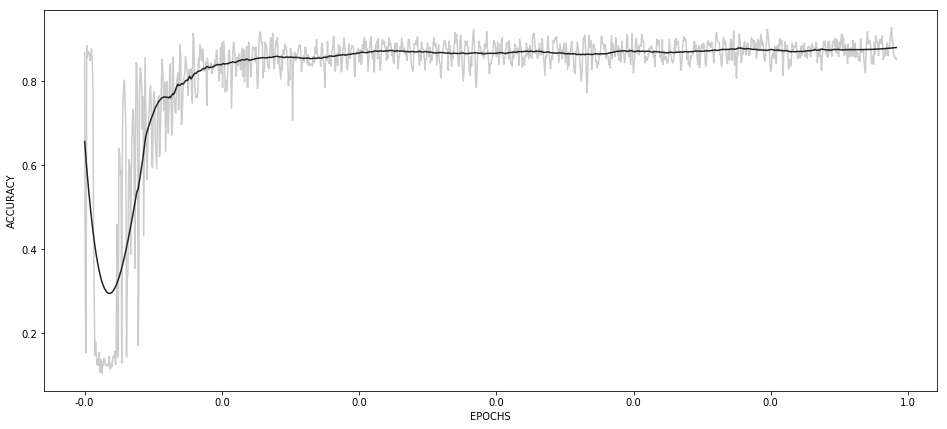

In [178]:
plt.rcParams["figure.figsize"] = [16,7]
f1hat = savgol_filter(train['ACCURACY'], 151, 3)
fig, ax = plt.subplots()
fig.canvas.draw()
plt.plot(T_train,train['ACCURACY'], color='#cccccc')
plt.plot(T_train,f1hat, color='#222222')
labels = ax.get_xticks()
labels = np.array(labels)//train.query('EPOCH==1').shape[0]
ax.set_xticklabels(labels)
plt.xlabel('EPOCHS')
plt.ylabel('ACCURACY')
plt.show()

### TEST F1 Score

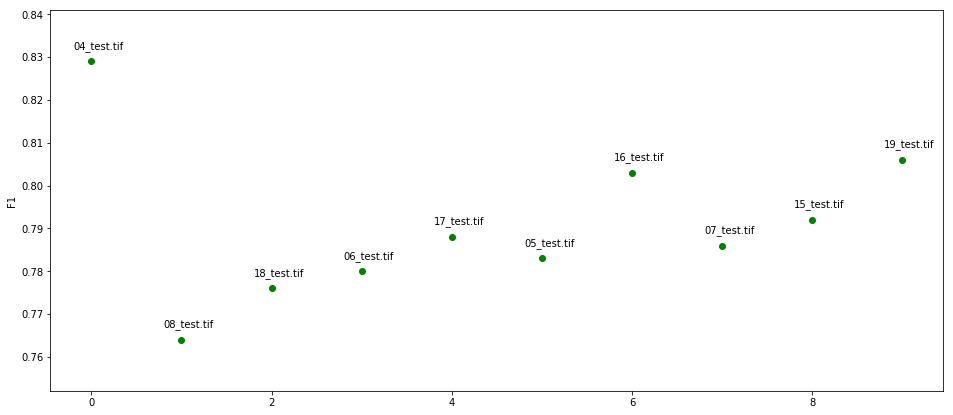

In [67]:
plt.rcParams["figure.figsize"] = [16,7]
fig, ax = plt.subplots()
plt.ylabel('F1')
ax.scatter(T_test, test['F1'], color='green')
for i, txt in enumerate(test['ID']):
    ax.annotate(txt, (T_test[i], test['F1'].iloc[i]), xytext=(T_test[i]-0.2, test['F1'].iloc[i]+0.003))
plt.show()

### TEST precision-recall

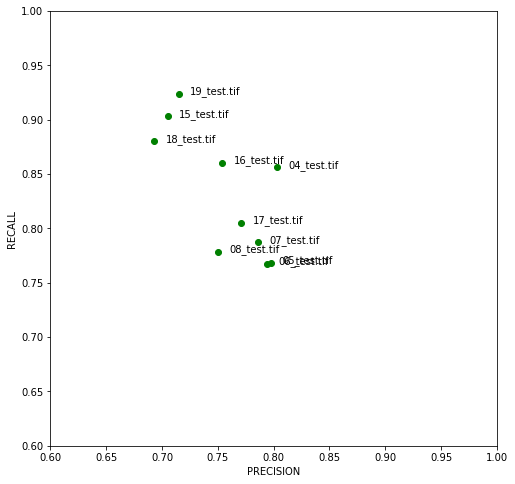

In [68]:
plt.rcParams["figure.figsize"] = [8,8]
fig, ax = plt.subplots()
plt.xlabel('PRECISION')
plt.ylabel('RECALL')
plt.scatter(test['PRECISION'], test['RECALL'], color='green')
for i, txt in enumerate(test['ID']):
    ax.annotate(txt, (test['PRECISION'].iloc[i]+0.01, test['RECALL'].iloc[i]))
plt.xlim((0.6, 1))
plt.ylim((0.6, 1))
plt.show()

### Test Accuracy

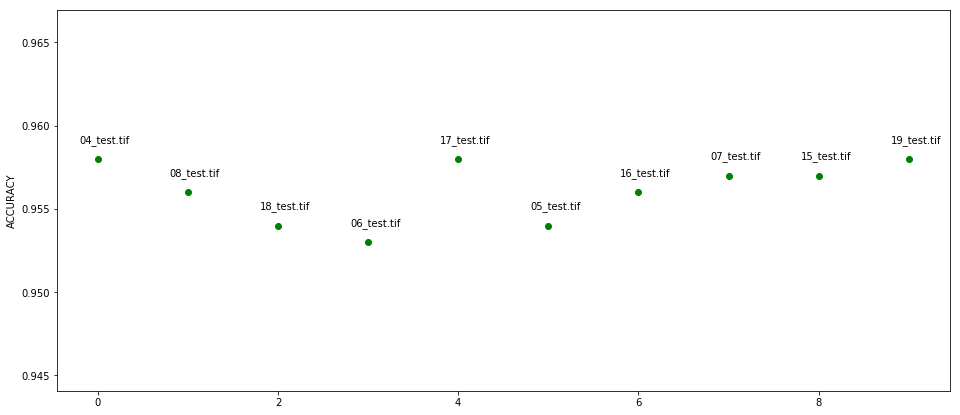

In [69]:
plt.rcParams["figure.figsize"] = [16,7]
fig, ax = plt.subplots()
plt.ylabel('ACCURACY')
ax.scatter(T_test, test['ACCURACY'], color='green')
for i, txt in enumerate(test['ID']):
    ax.annotate(txt, (T_test[i], test['ACCURACY'].iloc[i]), xytext=(T_test[i]-0.2, test['ACCURACY'].iloc[i]+0.001))
plt.show()

### MST

In [98]:
import numpy as np
from commons.segmentation import AtureTest
from PIL import Image as IMG
from commons.IMAGE import SegmentedImage
import cv2
import utils.filter_utils as filutils
import utils.img_utils as imgutils
### DRIVE dataset path setup #####
Dirs = {}

Dirs['data']      = 'data'+sep+'DRIVE'+sep+'testing'

Dirs['images']    = Dirs['data'] +sep+ 'images'
Dirs['mask']      = Dirs['data'] +sep+ 'mask'
Dirs['truth']     = Dirs['data'] +sep+ 'manual1'
Dirs['segmented'] = Dirs['data'] +sep+ 'segmented'

for k, folder in Dirs.items():
    os.makedirs(folder, exist_ok=True)

def get_mask_file(file_name): 
    return file_name.split('_')[0] + '_test_mask.gif'
def get_ground_truth_file(file_name): 
    return file_name.split('_')[0] + '_manual1.gif'

input_image = '05_test.tif'
###### Path end #####
params = {'sk_threshold': 100,
          'alpha': 5.0,
          'orig_contrib': 0.6,
          'seg_threshold': 15}

In [101]:
img_obj = SegmentedImage()

img_obj.load_file(data_dir=Dirs['images'], file_name=input_image)
img_obj.working_arr = img_obj.image_arr[:,:,1]
img_obj.apply_clahe()
img_obj.res['orig'] = img_obj.working_arr

img_obj.working_arr = imgutils.get_image_as_array(Dirs['segmented'] +sep+ '05_test.tif.png', channels=1)
img_obj.load_mask(mask_dir=Dirs['mask'], fget_mask=get_mask_file, erode=True)
img_obj.load_ground_truth(gt_dir=Dirs['truth'], fget_ground_truth=get_ground_truth_file)
img_obj.apply_mask()
img_obj.generate_skeleton(threshold=params['sk_threshold'])
img_obj.generate_lattice_graph()

"generate_skeleton(__)" ... took 0.001 seconds
"generate_lattice_graph(__)" ... took 2.168 seconds


In [102]:
tester = AtureTest(out_dir=Dirs['segmented'])
tester.run(params=params, save_images=False, img_obj=img_obj)
img_obj.res['scores']

"run_segmentation(__)" ... took 88.37 seconds
Number of params combination tried: 1


{'Accuracy': 0.9633834404170203,
 'F1': 0.8048016026883805,
 'Precision': 0.803866511747999,
 'Recall': 0.8057388716356108}

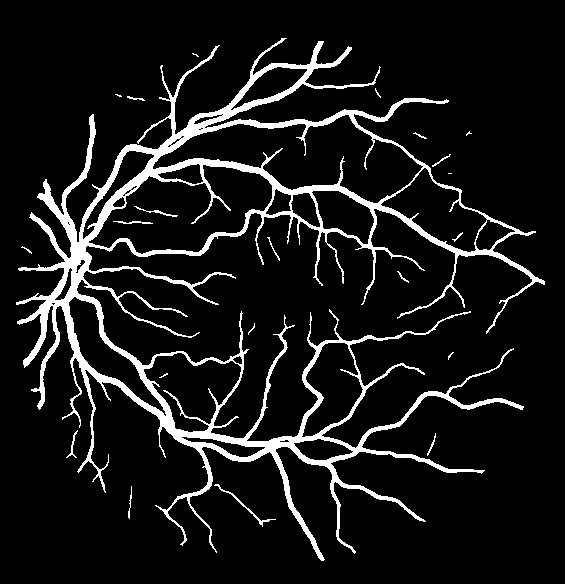

In [103]:
IMG.fromarray(img_obj.res['segmented'])

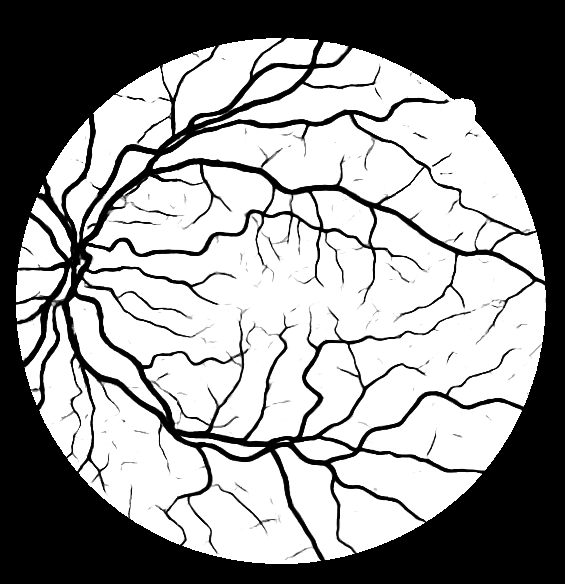

In [104]:
IMG.fromarray(img_obj.working_arr)

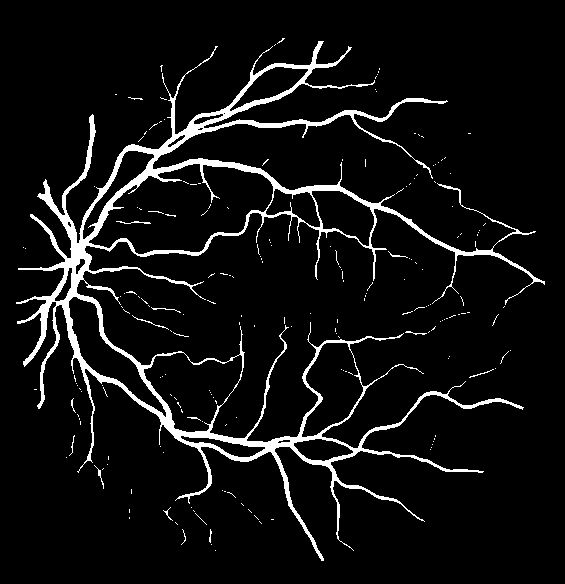

In [105]:
IMG.fromarray(img_obj.res['skeleton'])

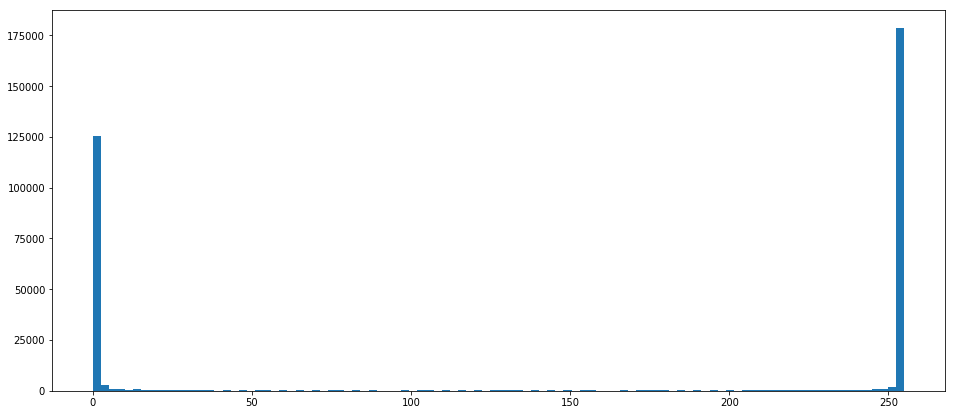

In [106]:
imgutils.histogram(img_obj.working_arr, bins=100)

In [168]:
arr = img_obj.working_arr.copy()

In [169]:
arr[arr>=150] = 255

In [170]:
arr[arr<150] = 0

In [171]:
for i in range(arr.shape[0]):
    for j in range(arr.shape[1]):
        if img_obj.mask[i,j] == 0:
            arr[i, j] =255

In [172]:
imgutils.get_praf1(255-arr, img_obj.ground_truth)

{'Accuracy': 0.963589526003152,
 'F1': 0.804370481339152,
 'Precision': 0.8098032786885246,
 'Recall': 0.7990100931677019}

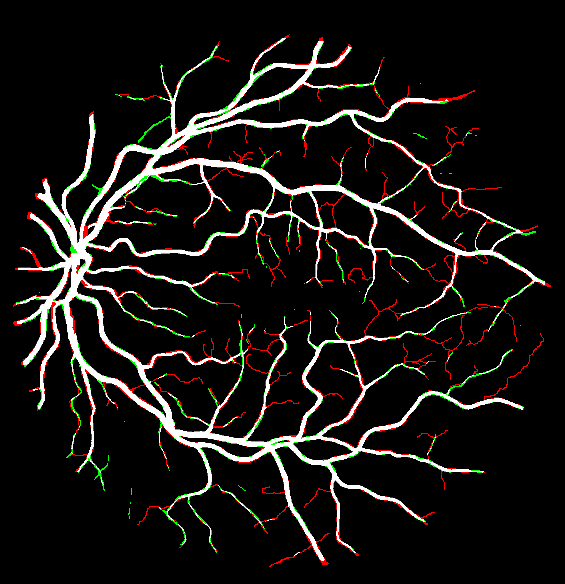

In [160]:
IMG.fromarray(imgutils.get_rgb_scores(255-arr, img_obj.ground_truth))

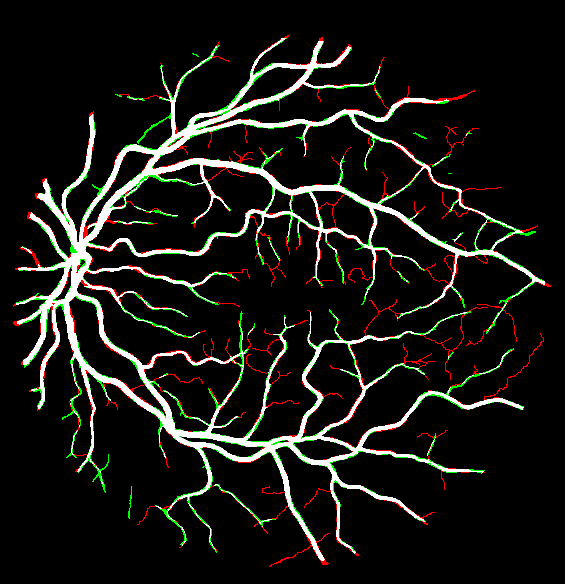

In [107]:
IMG.fromarray(imgutils.get_rgb_scores(img_obj.res['segmented'], img_obj.ground_truth))

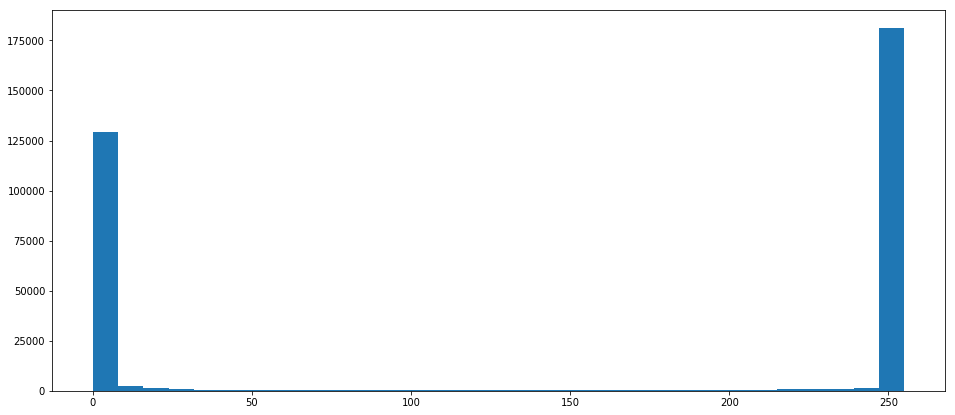

In [173]:
imgutils.histogram(img_obj.working_arr)

In [23]:
X = img_obj.working_arr
from sklearn.decomposition import NMF
model = NMF(n_components=10, init='random', random_state=0)
W = model.fit_transform(X)
H = model.components_

In [1]:
import random

In [9]:
x = random.uniform(0, 1) 

x

0.056503198567865565

In [7]:
x

0.49750817316371676